# Predicting Baseball Salaries 

## Data Exploration

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read in the batting, pitching, and salary data
batting = pd.read_csv('Batting.csv')
pitching = pd.read_csv('Pitching.csv')
salary = pd.read_csv('Salaries.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [5]:
salary.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [6]:
# Drop years before 1985.  Salaray data is not available
batting_1985 = batting[batting['yearID'] > 1984]
pitching_1985 = pitching[pitching['yearID'] > 1984]
batting_1985.head()


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
62239,aasedo01,1985,1,BAL,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62240,abregjo01,1985,1,CHN,NL,6,9,0,0,0,...,1.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
62241,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62242,adamsri02,1985,1,SFN,NL,54,121,12,23,3,...,10.0,1.0,1.0,5,23.0,3.0,1.0,3.0,0.0,2.0
62243,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
pitching_1985.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
24980,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,7.0,0.0,1.0,1,366.0,43.0,44,NaN,NaN,NaN
24981,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,1.0,0.0,0.0,0,109.0,0.0,18,NaN,NaN,NaN
24982,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,1.0,2.0,3.0,0,370.0,26.0,35,NaN,NaN,NaN
24983,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,1.0,0.0,3.0,0,246.0,21.0,27,NaN,NaN,NaN
24984,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,2.0,5.0,2.0,2,507.0,1.0,49,NaN,NaN,NaN


### Batting Data

In [8]:
# Descriptive Statistics for Batting Data (1985 - 2016)
batting_1985.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000
mean,2001.524657,1.081770,50.906647,123.737068,16.515045,32.355497,6.228085,0.700693,3.575868,15.648742,2.358849,1.015920,11.900288,23.642581,0.973310,1.101831,1.217389,1.026222,2.777411
std,9.085021,0.287192,46.107731,181.238290,27.029322,50.721758,10.234521,1.626015,7.372347,26.539534,6.542026,2.348021,20.513077,34.268786,2.719686,2.443462,2.447796,1.959216,4.693949
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,1.000000,34.000000,22.000000,2.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,1.000000,75.000000,189.000000,22.000000,47.000000,9.000000,1.000000,3.000000,21.000000,1.000000,1.000000,16.000000,35.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,2016.000000,4.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.000000


Plot the distributions of feature variables.  From inspecting the table of descriptive statistics it looks like there are enough zeros for each feature that would highly skew the distributions to the right.  This can be detected by noticing that the mean of most of the features is quite a bit higher than the median.  Some of the features actually have a median of zero.  It appears that a simple transformation will not address the issue and, therefore, some rows may need to be dropped due to insufficient information.

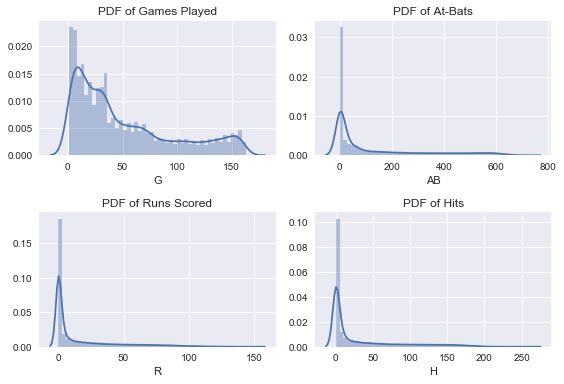

In [13]:
plt.subplot(2,2,1)
sns.distplot(batting_1985.G)
plt.title("PDF of Games Played")
plt.subplot(2,2,2)
sns.distplot(batting_1985.AB)
plt.title("PDF of At-Bats")
plt.subplot(2,2,3)
sns.distplot(batting_1985.R)
plt.title("PDF of Runs Scored")
plt.subplot(2,2,4)
sns.distplot(batting_1985.H)
plt.title("PDF of Hits")
plt.tight_layout()
plt.show()
